# POSTTEST 5
## Nama : Sancto Metano Crozart
## Nim : 2109106112

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

## Mengurangi jumlah dataset

In [106]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop(df.index[6001:462417], inplace=True)

In [107]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## A. Supervised Learning
## Support Vector Classifier (dari SVM), jika menggunakan label Kategorikal

In [108]:
X = df[['Age', 'Clothing ID']]
y = df['Division Name']

## Memposisikan kelas target ke label biner

In [109]:
y = np.where(y == 'Initmates', 1, -1)

## Mengelompokan data (split) ke train set dan test set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Membuat objek classifier SVM

In [111]:
svm = SVC(kernel="rbf")

## Melatih classifier dengan data train

In [112]:
svm.fit(X_train, y_train)

SVC()

## Melakukan prediksi data test dengan model

In [113]:
y_pred = svm.predict(X_test)

## Menyimpan nilai support vectors dan indeksnya

In [114]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

## Scatter PLot untuk menampilkan titik titik support vector

C:\Users\Lenovo\OneDrive\Documents\VENV_C1_21\Sancto_112\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


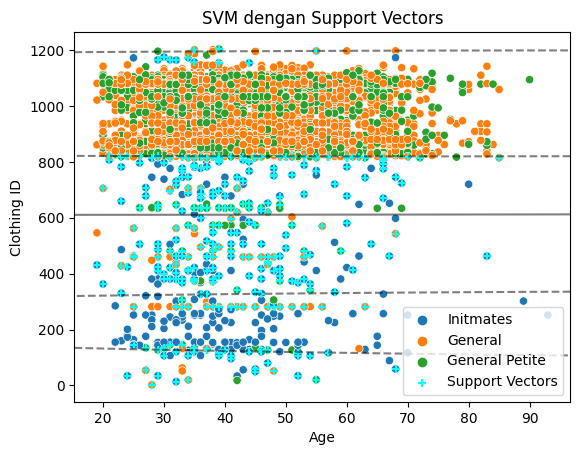

In [115]:
sns.scatterplot(x='Age', y='Clothing ID', hue='Division Name', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('Age')
plt.ylabel('Clothing ID')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

In [116]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      1715
           1       0.62      0.76      0.68        86

    accuracy                           0.97      1801
   macro avg       0.81      0.87      0.83      1801
weighted avg       0.97      0.97      0.97      1801



## Membuat linear regresion

In [117]:
X, y = df[['Age']], df['Clothing ID']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [119]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

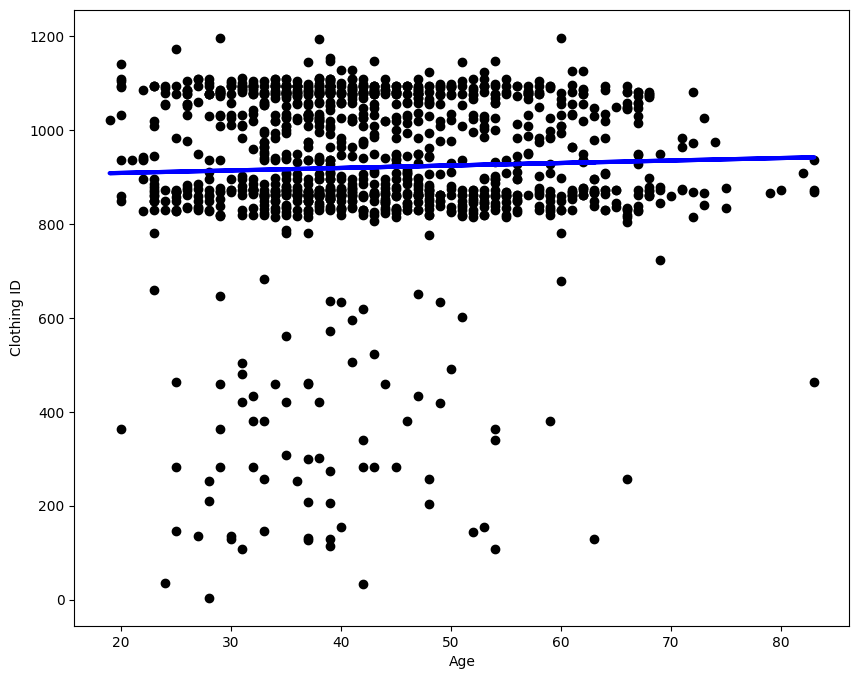

In [120]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Age")
plt.ylabel("Clothing ID")
plt.show()

In [121]:
svm = SVC(kernel="linear")

In [122]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [123]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 169.09908409658618
MSE : 62895.46211490424
RMSE : 250.7896770501215
R-Squared : -0.7834891859259683


## Unsupervise Learning

### Menggunakan fitur X dan menentukan banyaknya kelompok

In [124]:
X = df[["Age", "Rating"]]
K = 2

In [125]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

## Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [126]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

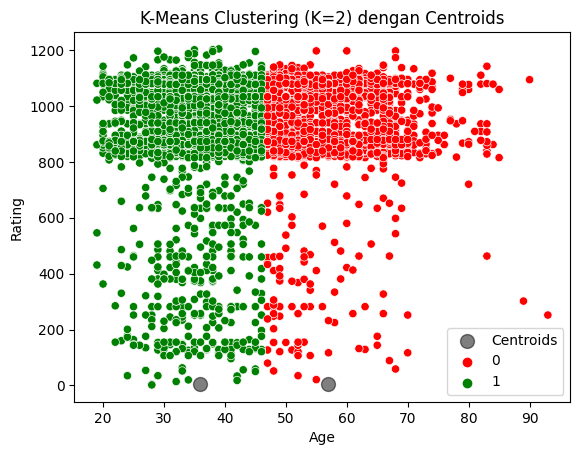

In [127]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="Age", y="Clothing ID", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [128]:
cross_tab = pd.crosstab(df["cluster"], df["Division Name"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Division Name  General  General Petite  Initmates
cluster                                          
0                 1285             774         89
1                 2288            1328        237 



In [129]:
ari = adjusted_rand_score(df["Division Name"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): -0.00


In [130]:
true_labels_num = df["Division Name"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


## Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [131]:
homogeneity = homogeneity_score(df["Division Name"], cluster_labels)
completeness = completeness_score(df["Division Name"], cluster_labels)
v_measure = v_measure_score(df["Division Name"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.00
Completeness Score: 0.00
V-Measure Score: 0.00
